# 5-4-ChIP-RNAi-RNA-R 
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook
* 1. Introduction
* 2. O

## Files

# 1. Introduction

# 2. MBD3/4 RNAi Differential expression: Sleuth

## 2.1 Gene-level differential expression Sleuth

In [ ]:
library(sleuth)

In [1]:
sf_dirs <- file.path("/hydra/chip_RNAi/RNAseq", 
        c("SRR4068859_kallisto",
          "SRR4068860_kallisto",
          "SRR4068861_kallisto",
          "SRR4068862_kallisto"
          ))
sf_dirs

[1] "/hydra/chip_RNAi/RNAseq/SRR4068859_kallisto"
[2] "/hydra/chip_RNAi/RNAseq/SRR4068860_kallisto"
[3] "/hydra/chip_RNAi/RNAseq/SRR4068861_kallisto"
[4] "/hydra/chip_RNAi/RNAseq/SRR4068862_kallisto"

In [1]:
sf_dirs_samples = c("SRR4068859", "SRR4068860", "SRR4068861", "SRR4068862")
sampletype = factor(c("RNAi", "RNAi", "control", "control"))

In [3]:
summarydata <- data.frame(sampletype, row.names = sf_dirs_samples)
all(sf_dirs_samples == rownames(summarydata))

[1] TRUE

In [4]:
names(sf_dirs) = sf_dirs_samples
sf_dirs

SRR4068859 
"/hydra/chip_RNAi/RNAseq/SRR4068859_kallisto" 
                                   SRR4068860 
"/hydra/chip_RNAi/RNAseq/SRR4068860_kallisto" 
                                   SRR4068861 
"/hydra/chip_RNAi/RNAseq/SRR4068861_kallisto" 
                                   SRR4068862 
"/hydra/chip_RNAi/RNAseq/SRR4068862_kallisto"

In [5]:
summarydata$sample <- rownames(summarydata)

In [6]:
summarydata$path <- sf_dirs

In [7]:
design <- ~ sampletype

In [8]:
ttg = read.csv("/hydra/FACS/sleuth_ttg.csv")
nrow(ttg)

[1] 90773

In [9]:
summarydata

sampletype sample     path                                       
SRR4068859 RNAi       SRR4068859 /hydra/chip_RNAi/RNAseq/SRR4068859_kallisto
SRR4068860 RNAi       SRR4068860 /hydra/chip_RNAi/RNAseq/SRR4068860_kallisto
SRR4068861 wt         SRR4068861 /hydra/chip_RNAi/RNAseq/SRR4068861_kallisto
SRR4068862 wt         SRR4068862 /hydra/chip_RNAi/RNAseq/SRR4068862_kallisto

In [ ]:
so <- sleuth_prep(summarydata, target_mapping = ttg,
  aggregation_column = 'ens_gene', extra_bootstrap_summary = TRUE)

In [ ]:
so = sleuth_fit(so, ~sampletype, "full")
so = sleuth_fit(so, ~1, "reduced")
so = sleuth_lrt(so, "reduced", "full")
sleuth_table_gene = sleuth_results(so, "reduced:full", "lrt", show_all=FALSE)
write.csv(sleuth_table_gene, "/hydra/FACS/sleuth_table_geneRNAi.csv")

## 2.2 Transcript-level differential expression Sleuth

In [ ]:
so <- sleuth_prep(summarydata, full_model=design, target_mapping = ttg, read_bootstrap_tpm = TRUE, extra_bootstrap_summary = TRUE, transformation_function = function(x) log2(x + 0.5))

In [ ]:
so <- sleuth_fit(so)

In [ ]:
oe <- sleuth_wt(so, which_beta = 'sampletypeRNAi')

In [ ]:
sleuth_results_oe <- sleuth_results(oe, test = 'sampletypeRNAi', show_all = TRUE)

In [ ]:
write.csv(sleuth_table_gene, "/hydra/FACS/sleuth_table_transcriptsRNAi_april21.csv")

# 3. Differential expression: DeSeq2

In [1]:
library(tximport)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
sf_dirs <- file.path("/hydra/chip_RNAi/RNAseq", 
        c("SRR4068859_kallisto/abundance.h5",
          "SRR4068860_kallisto/abundance.h5",
          "SRR4068861_kallisto/abundance.h5",
          "SRR4068862_kallisto/abundance.h5"
          ))
sf_dirs

[1] "/hydra/chip_RNAi/RNAseq/SRR4068859_kallisto/abundance.h5"
[2] "/hydra/chip_RNAi/RNAseq/SRR4068860_kallisto/abundance.h5"
[3] "/hydra/chip_RNAi/RNAseq/SRR4068861_kallisto/abundance.h5"
[4] "/hydra/chip_RNAi/RNAseq/SRR4068862_kallisto/abundance.h5"

In [6]:
sf_dirs <- file.path("/hydra/chip_RNAi/RNAseq", 
        c("gfp1_kallisto/abundance.h5",
          "gfp2_kallisto/abundance.h5",
          "lpt1_kallisto/abundance.h5",
          "lpt2_kallisto/abundance.h5"
          ))
sf_dirs

[1] "/hydra/chip_RNAi/RNAseq/gfp1_kallisto/abundance.h5"
[2] "/hydra/chip_RNAi/RNAseq/gfp2_kallisto/abundance.h5"
[3] "/hydra/chip_RNAi/RNAseq/lpt1_kallisto/abundance.h5"
[4] "/hydra/chip_RNAi/RNAseq/lpt2_kallisto/abundance.h5"

In [7]:
sf_dirs_samples = c("SRR4068859", "SRR4068860", "SRR4068861", "SRR4068862")
names(sf_dirs) = sf_dirs_samples

In [7]:
sf_dirs_samples = c("gfp1", "gfp2", "lpt1", "lpt2")
names(sf_dirs) = sf_dirs_samples

In [8]:
ttg = read.csv("/hydra/FACS/sleuth_ttg.csv")

In [9]:
txi <- tximport(sf_dirs, type="kallisto", tx2gene=ttg, countsFromAbundance="lengthScaledTPM")

1 
2 
3 
4 


transcripts missing from tx2gene: 295

summarizing abundance

summarizing counts

summarizing length

summarizing inferential replicates



In [ ]:
sampletype = factor(c("RNAi", "RNAi", "control", "control"))
meta <- data.frame(sampletype, row.names = colnames(txi$counts))

In [10]:
sampletype = factor(c("control", "control", "RNAi", "RNAi"))
meta <- data.frame(sampletype, row.names = colnames(txi$counts))

In [11]:
all(colnames(txi$counts) %in% rownames(meta))
all(colnames(txi$counts) == rownames(meta))

[1] TRUE

[1] TRUE

In [13]:
library(DESeq2)

In [14]:
dds <- DESeqDataSetFromTximport(txi, colData = meta, design = ~ sampletype)

using just counts from tximport



In [15]:
dds <- estimateSizeFactors(dds)

In [16]:
normalized_counts <- counts(dds, normalized=TRUE)

In [18]:
write.table(normalized_counts, file="/hydra/chip_RNAi/RNAseq/DESeq2normalized_counts.txt", sep="\t", quote=F, col.names=NA)

In [24]:
write.table(normalized_counts, file="/hydra/chip_RNAi/RNAseq/DESeq2normalized_counts_Oct21.txt", sep="\t", quote=F, col.names=NA)

In [17]:
rld <- rlog(dds, blind=TRUE)

In [18]:
dds

class: DESeqDataSet 
dim: 28003 4 
metadata(1): version
assays(1): counts
rownames(28003): MSTRG.1 MSTRG.10 ... SMESG000081986.1 SMESG000081995.1
rowData names(0):
colnames(4): gfp1 gfp2 lpt1 lpt2
colData names(2): sampletype sizeFactor

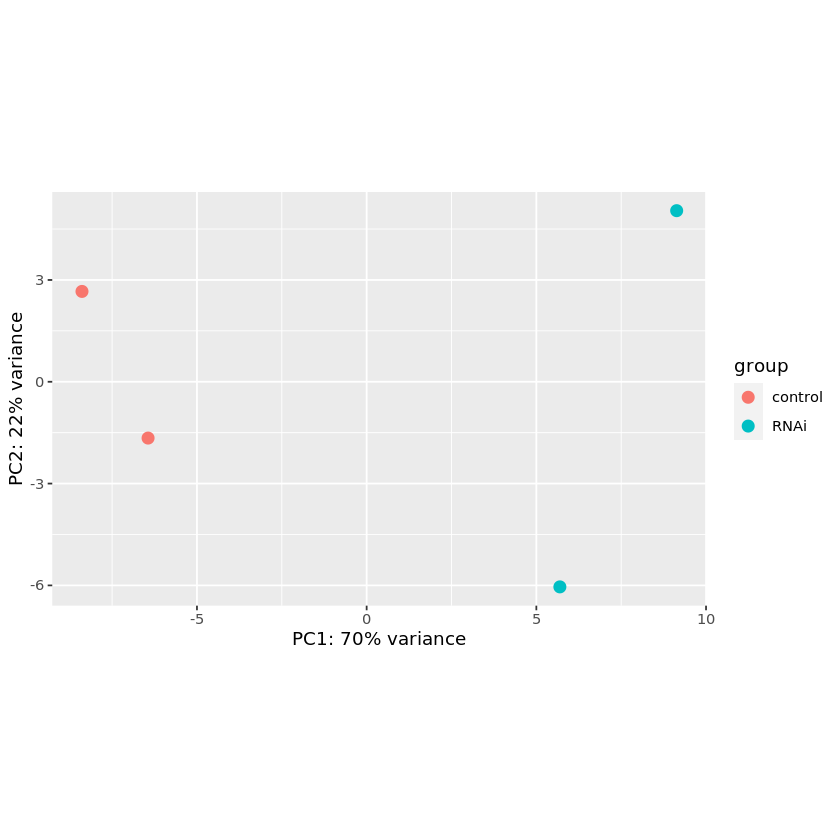

In [19]:
plotPCA(rld, intgroup="sampletype")

In [20]:
rld_mat <- assay(rld)    
rld_cor <- cor(rld_mat)

In [21]:
library(pheatmap)

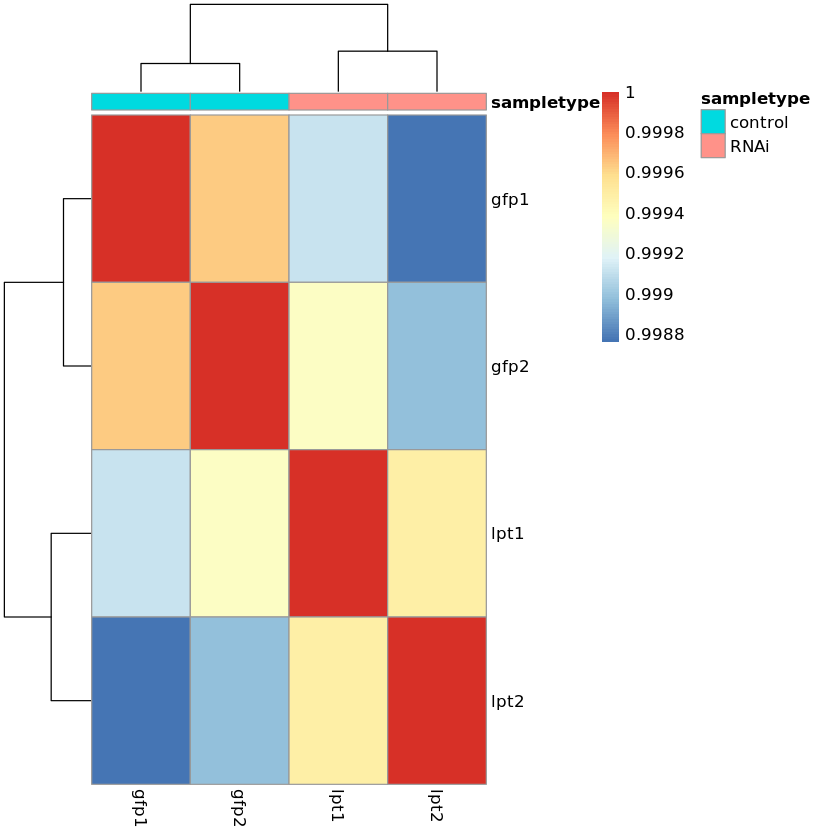

In [22]:
pheatmap(rld_cor, annotation = meta)

In [23]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



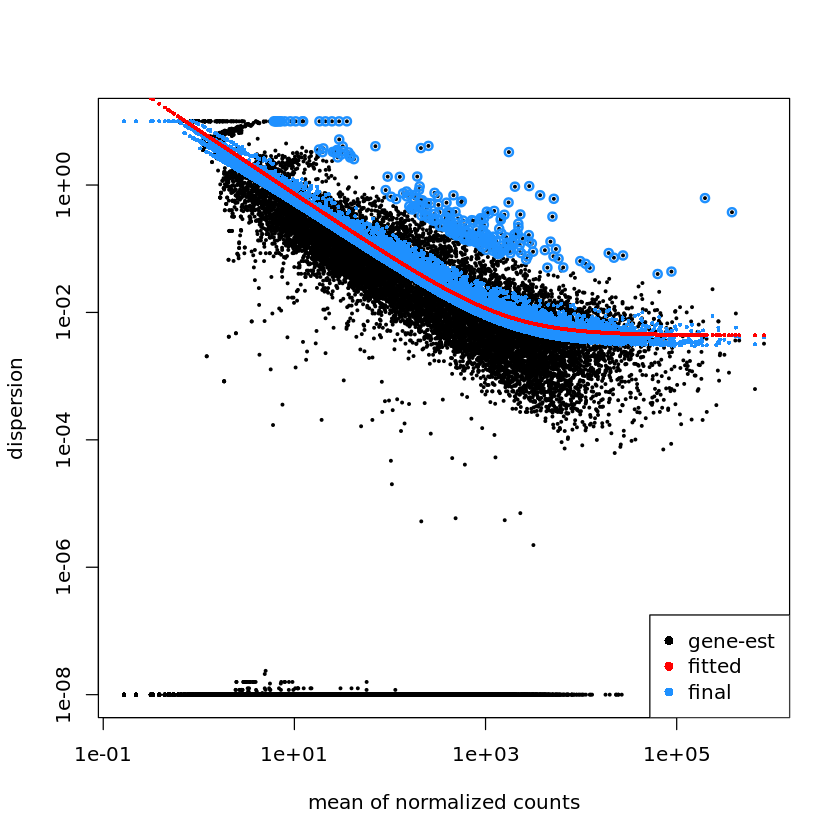

In [25]:
plotDispEsts(dds)

In [26]:
res_table = results(dds)

In [27]:
res_tabledf = res_table %>% data.frame() 

In [28]:
write.csv(res_tabledf, "/hydra/chip_RNAi/RNAseq/DESeq2_table_geneRNAioct21.csv")

# 3. Differential expression results

## 3.1 Gene-level differential expression

### 3.1.1 Sleuth

In [15]:
sleuth_table_gene = read.csv("/hydra/chip_RNAi/RNAseq/sleuth_table_geneRNAi.csv")

In [16]:
sleuth_table_signf = subset(sleuth_table_gene, sleuth_table_gene$qval < 0.05)

In [17]:
enhancer_annotation_FACSRNAi = read.csv("/hydra/enhancer_regions/enhancer_annotation_FACSRNAi_july21.csv")

In [18]:
enhancer_annotation_FACSRNAi$K4me1gene = "0"
enhancer_annotation_FACSRNAi$K4me1color = "0"
enhancer_annotation_FACSRNAi$K4me3color = "0"
for (i in 1:nrow(enhancer_annotation_FACSRNAi)){
    if (enhancer_annotation_FACSRNAi$geneId[i] %in% sleuth_table_signf$target_id){
        enhancer_annotation_FACSRNAi$K4me1gene[i] = "1"
        if (enhancer_annotation_FACSRNAi$K4me1RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me1color[i] = "1"
        }
        if (enhancer_annotation_FACSRNAi$K4me3RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me3color[i] = "1"
        }
    }
}

In [19]:
write.csv(enhancer_annotation_FACSRNAi, "/hydra/FACS/enhancer_annotation_FACSRNAi_sleuth_july21.csv", row.names=FALSE)

In [1]:
enhancer_geneRNAi = read.csv("/hydra/FACS/enhancer_annotation_FACSRNAi_sleuth_july21.csv")
enhancer_geneRNAi$K4me1gene = as.factor(enhancer_geneRNAi$K4me1gene)
enhancer_geneRNAi$K4me1color = as.factor(enhancer_geneRNAi$K4me1color)
enhancer_geneRNAi$K4me3color = as.factor(enhancer_geneRNAi$K4me3color)

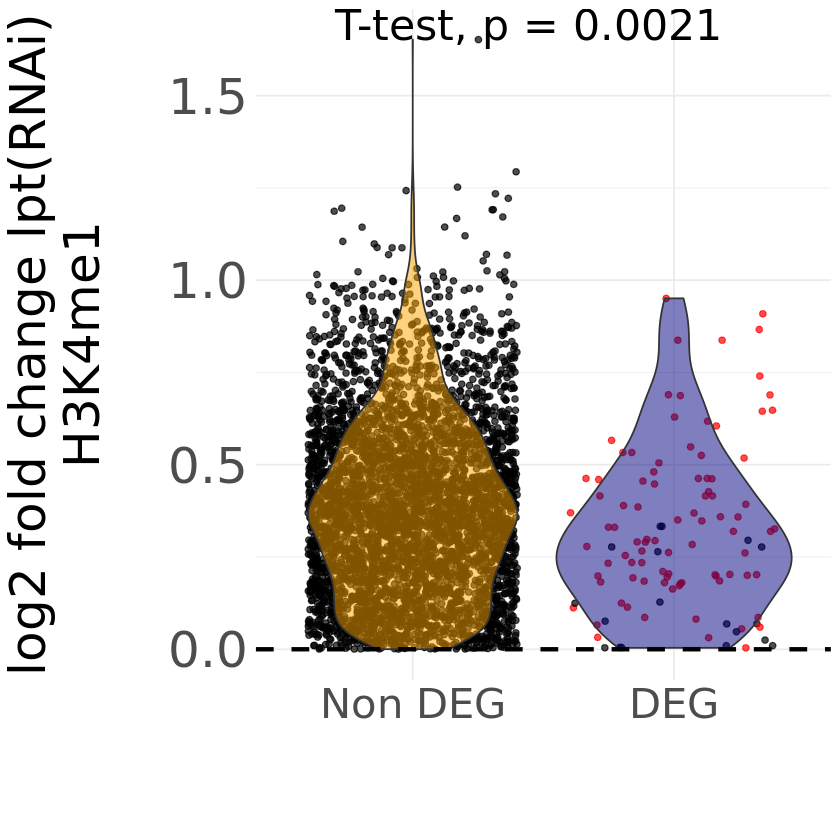

In [3]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 7)
my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(enhancer_geneRNAi, aes(x=K4me1gene, y=abs(K4me1RNAi), fill=K4me1gene)) +geom_jitter(aes(col=K4me1color), alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me1\n")
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG"))
p = p + stat_compare_means(method = "t.test", size=9)
p

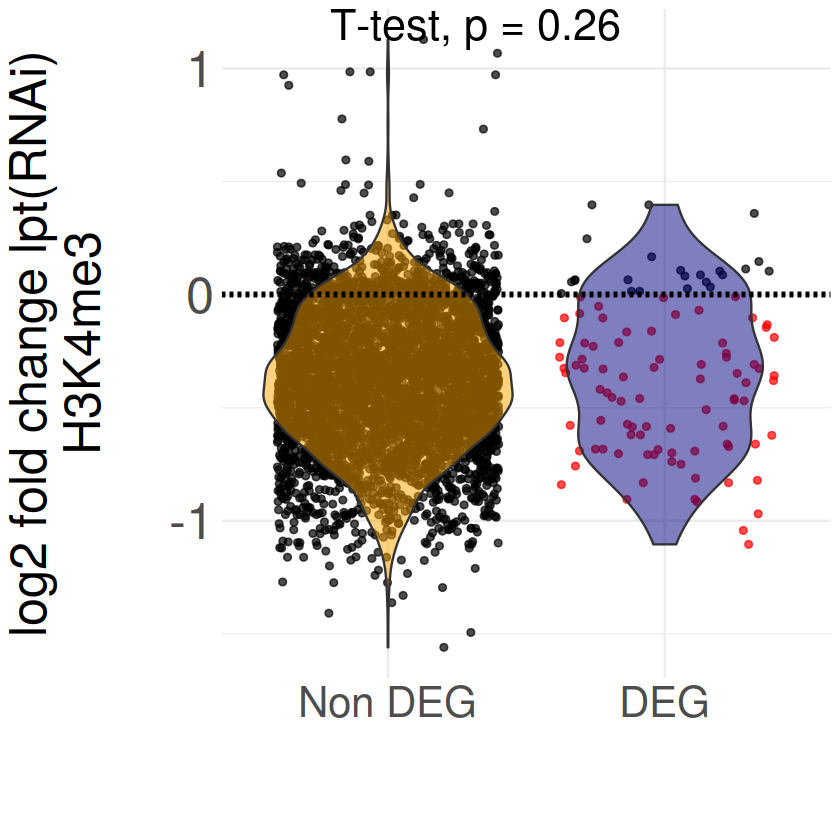

In [36]:
library(ggpubr)
options(repr.plot.width = 7, repr.plot.height = 7)
#my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(enhancer_geneRNAi, aes(x=K4me1gene, y=K4me3RNAi, fill=K4me1gene)) +geom_jitter(aes(col=K4me3color), alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me3\n")
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG"))
p = p + stat_compare_means(method = "t.test", size=9)
p

### 3.1.2 DeSeq2

In [29]:
deseq_table_gene = read.csv("/hydra/chip_RNAi/RNAseq/DESeq2_table_geneRNAioct21.csv")

In [30]:
deseq_table_signf = subset(deseq_table_gene, deseq_table_gene$pvalue < 0.05)

In [31]:
enhancer_annotation_FACSRNAi = read.csv("/hydra/enhancer_regions/enhancer_annotation_FACSRNAi_july21.csv")

In [32]:
enhancer_annotation_FACSRNAi$K4me1gene = "0"
enhancer_annotation_FACSRNAi$K4me1color = "0"
enhancer_annotation_FACSRNAi$K4me3color = "0"
for (i in 1:nrow(enhancer_annotation_FACSRNAi)){
    if (enhancer_annotation_FACSRNAi$geneId[i] %in% deseq_table_signf$X){
        enhancer_annotation_FACSRNAi$K4me1gene[i] = "1"
        if (enhancer_annotation_FACSRNAi$K4me1RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me1color[i] = "1"
        }
        if (enhancer_annotation_FACSRNAi$K4me3RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me3color[i] = "1"
        }
    }
}

In [33]:
write.csv(enhancer_annotation_FACSRNAi, "/hydra/FACS/enhancer_annotation_FACSRNAi_deseq_oct21.csv", row.names=FALSE)

In [34]:
enhancer_geneRNAi = read.csv("/hydra/FACS/enhancer_annotation_FACSRNAi_deseq_oct21.csv")
enhancer_geneRNAi$K4me1gene = as.factor(enhancer_geneRNAi$K4me1gene)
enhancer_geneRNAi$K4me1color = as.factor(enhancer_geneRNAi$K4me1color)
enhancer_geneRNAi$K4me3color = as.factor(enhancer_geneRNAi$K4me3color)

In [36]:
k4me1random = read.table("/hydra/chip_RNAi/k4me1lptaroundrandom_july21.tab", skip=3)

In [37]:
k4me1random_mean = apply(k4me1random, 1, mean, na.rm=TRUE)

In [38]:
df = data.frame("class" = c(enhancer_geneRNAi$K4me1gene, as.factor(rep("2", 10000))), "signal" = c(enhancer_geneRNAi$K4me1RNAi, k4me1random_mean), "color" = c(enhancer_geneRNAi$K4me1color, as.factor(rep("0", 10000))))

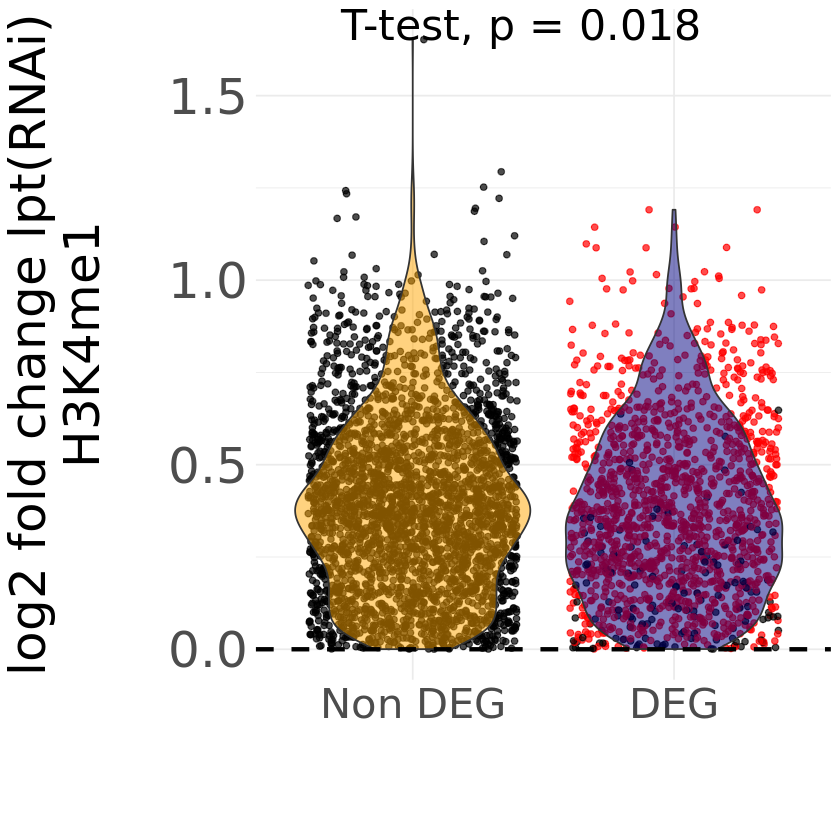

In [39]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 7)
my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(enhancer_geneRNAi, aes(x=K4me1gene, y=abs(K4me1RNAi), fill=K4me1gene)) +geom_jitter(aes(col=K4me1color), alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me1\n")
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG"))
p = p + stat_compare_means(method = "t.test", size=9)
p

In [5]:
df = data.frame("class" = as.factor(c(rep("1", length(enhancer_geneRNAi$K4me1gene)), rep("2", 10000))), "signal" = c(enhancer_geneRNAi$K4me1RNAi, k4me1random_mean), "color" = c(enhancer_geneRNAi$K4me1color, as.factor(rep("0", 10000))))

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


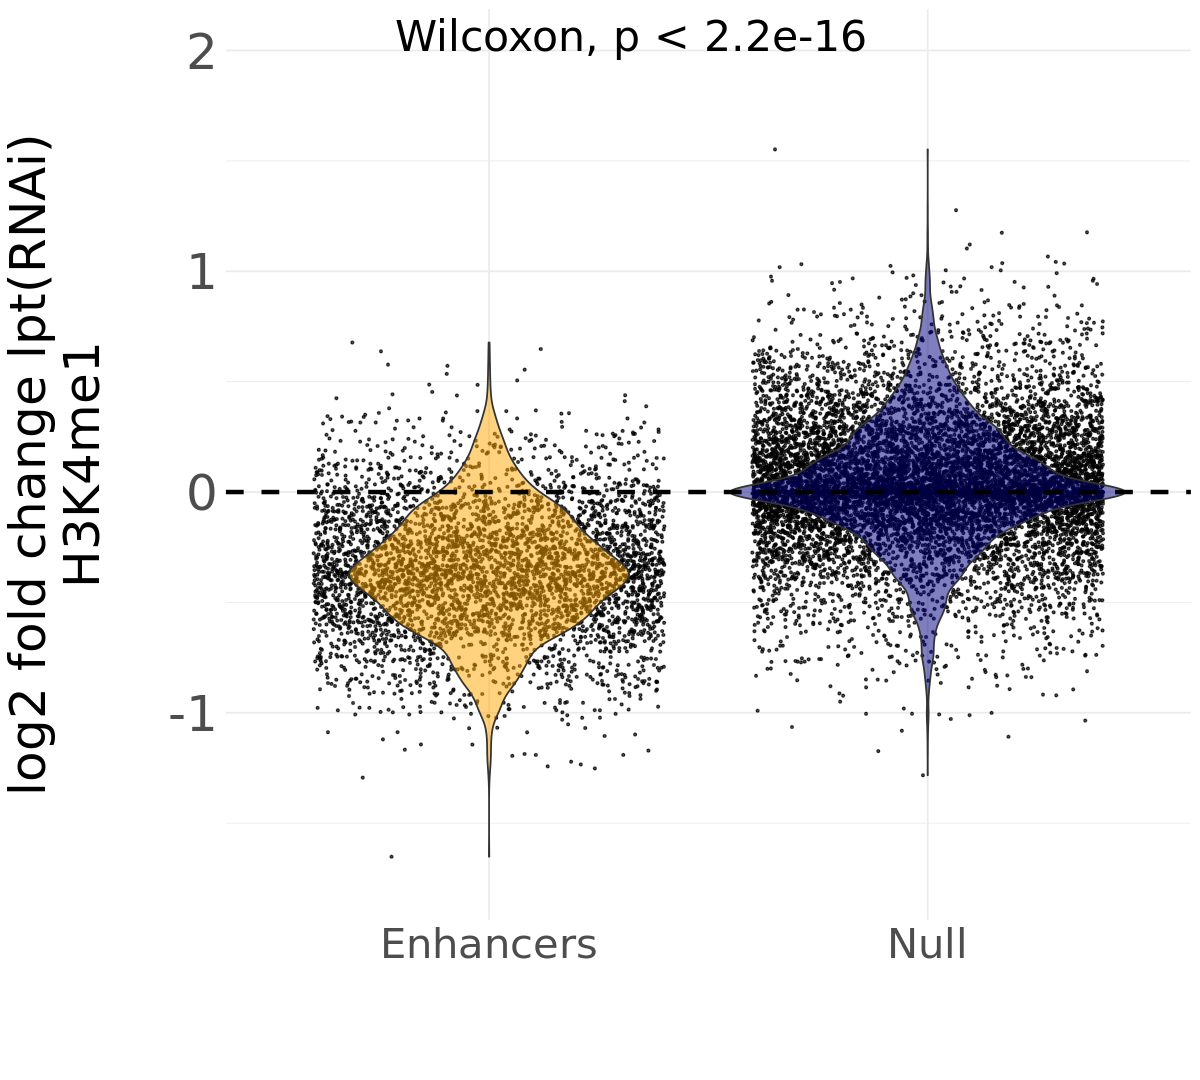

In [8]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 9)
#my_comparisons = list( c("0", "1"), c("0", "2"), c("1", "2"))
p = ggplot(df, aes(x=class, y=signal, fill=class)) +geom_jitter(size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
#p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me1\n")+ylim(-1.75,2)
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Enhancers", "Null"))
p = p + stat_compare_means(size=9)
p

In [94]:
mean(subset(enhancer_geneRNAi, enhancer_geneRNAi$K4me1gene == "0")$K4me1RNAi, na.rm=TRUE)
mean(subset(enhancer_geneRNAi, enhancer_geneRNAi$K4me1gene == "1")$K4me1RNAi, na.rm=TRUE)

[1] -0.3610819

[1] -0.2760583

In [10]:
k4me3random = read.table("/hydra/chip_sexual_organised/k4me3/k4me3lptaroundrandom_july21.tab", skip=3)
k4me3random_mean = apply(k4me3random, 1, mean, na.rm=TRUE)

In [104]:
df = data.frame("class" = c(enhancer_geneRNAi$K4me1gene, as.factor(rep("2", 10000))), "signal" = c(enhancer_geneRNAi$K4me3RNAi, k4me3random_mean), "color" = c(enhancer_geneRNAi$K4me3color, as.factor(rep("0", 10000))))

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_signif).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


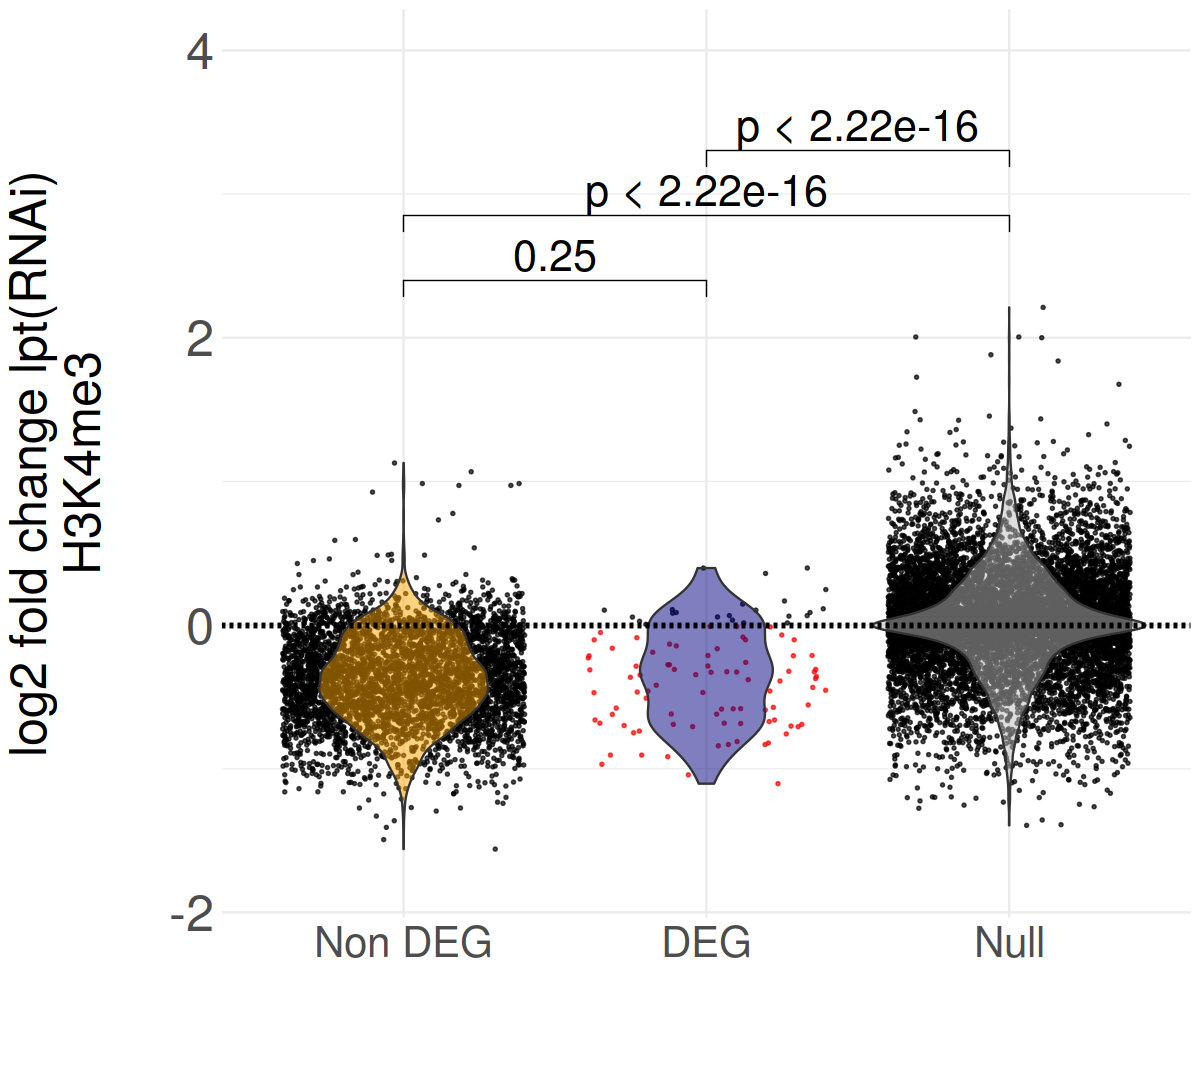

In [106]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 9)
my_comparisons = list( c("0", "1"), c("0", "2"), c("1", "2"))
p = ggplot(df, aes(x=class, y=signal, fill=class)) +geom_jitter(aes(col=color), size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue", "grey"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me3\n")+ylim(-1.75,4)
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG", "Null"))
p = p + stat_compare_means(comparisons = my_comparisons, size=9)
p

In [13]:
df = data.frame("class" = as.factor(c(rep("1", length(enhancer_geneRNAi$K4me1gene)), rep("2", 10000))), "signal" = c(enhancer_geneRNAi$K4me3RNAi, k4me3random_mean), "color" = c(enhancer_geneRNAi$K4me3color, as.factor(rep("0", 10000))))

Warning message:
“Removed 6 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 6 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


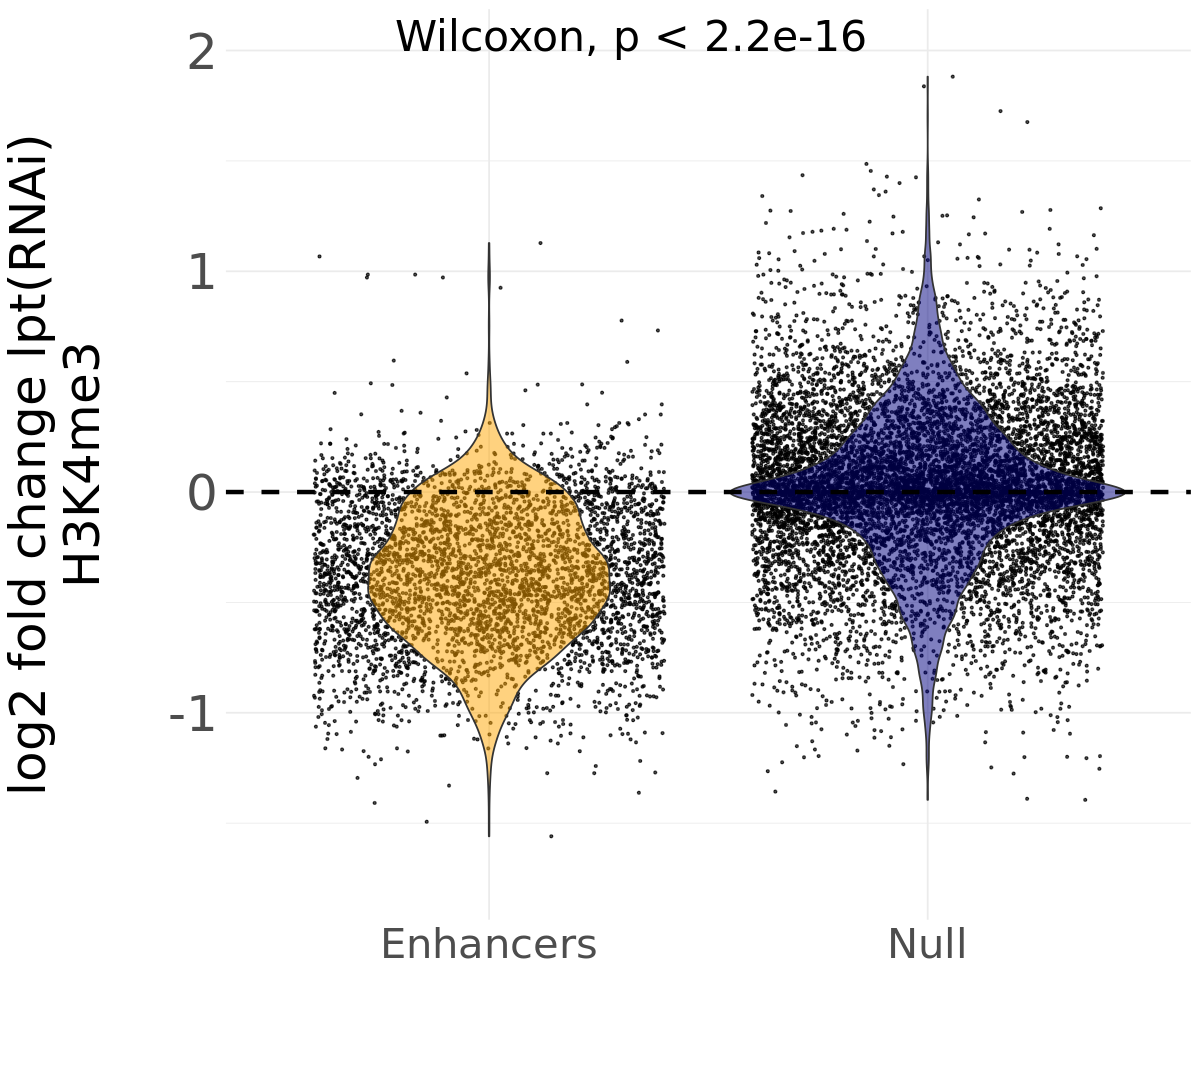

In [14]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 9)
#my_comparisons = list( c("0", "1"), c("0", "2"), c("1", "2"))
p = ggplot(df, aes(x=class, y=signal, fill=class)) +geom_jitter(size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
#p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me3\n")+ylim(-1.75,2)
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Enhancers", "Null"))
p = p + stat_compare_means(size=9)
p

## 3.2 Transcript-level differential expression

In [29]:
sleuth_table_gene = read.csv("/hydra/FACS/sleuth_table_transcriptsRNAi_april21.csv")

In [31]:
enhancer_annotation_FACSRNAi = read.csv("/hydra/enhancer_regions/enhancer_annotation_FACSRNAi.csv")

In [32]:
enhancer_annotation_FACSRNAi$K4me1gene = "0"
enhancer_annotation_FACSRNAi$K4me1color = "0"
enhancer_annotation_FACSRNAi$K4me3color = "0"
enhancer_annotation_FACSRNAi$K4me1RNAsignf = "NA"
enhancer_annotation_FACSRNAi$K4me1RNAlogFC = 0
for (i in 1:nrow(enhancer_annotation_FACSRNAi)){
    gene_table = sleuth_table_gene[which(sleuth_table_gene$ens_gene == enhancer_annotation_FACSRNAi$geneId[i]),]
    qvalue = min(gene_table$qval, na.rm=TRUE)
    bvalue = subset(gene_table, gene_table$qval == min(gene_table$qval, na.rm=TRUE))$b[1]
    if (length(qvalue) == 1){
        enhancer_annotation_FACSRNAi$K4me1RNAsignf[i] = qvalue
        enhancer_annotation_FACSRNAi$K4me1RNAlogFC[i] = bvalue
    }
    if (enhancer_annotation_FACSRNAi$K4me1RNAsignf[i] < 0.05){
        enhancer_annotation_FACSRNAi$K4me1gene[i] = "1"
        if (enhancer_annotation_FACSRNAi$K4me1RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me1color[i] = "1"
        }
        if (enhancer_annotation_FACSRNAi$K4me3RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me3color[i] = "1"
        }
    }
}

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in min(gene_table$qval, na.rm = TRUE):
“no non-m

In [34]:
write.csv(enhancer_annotation_FACSRNAi, "/hydra/FACS/enhancer_annotation_FACSRNAi_annotated_transcripts.csv", row.names=FALSE)

In [35]:
enhancer_transcriptsRNAi = read.csv("/hydra/FACS/enhancer_annotation_FACSRNAi_annotated_transcripts.csv")

In [61]:
enhancer_transcriptsRNAi$K4me1gene = as.factor(enhancer_transcriptsRNAi$K4me1gene)
enhancer_transcriptsRNAi$K4me1color = as.factor(enhancer_transcriptsRNAi$K4me1color)
enhancer_transcriptsRNAi$K4me3color = as.factor(enhancer_transcriptsRNAi$K4me3color)

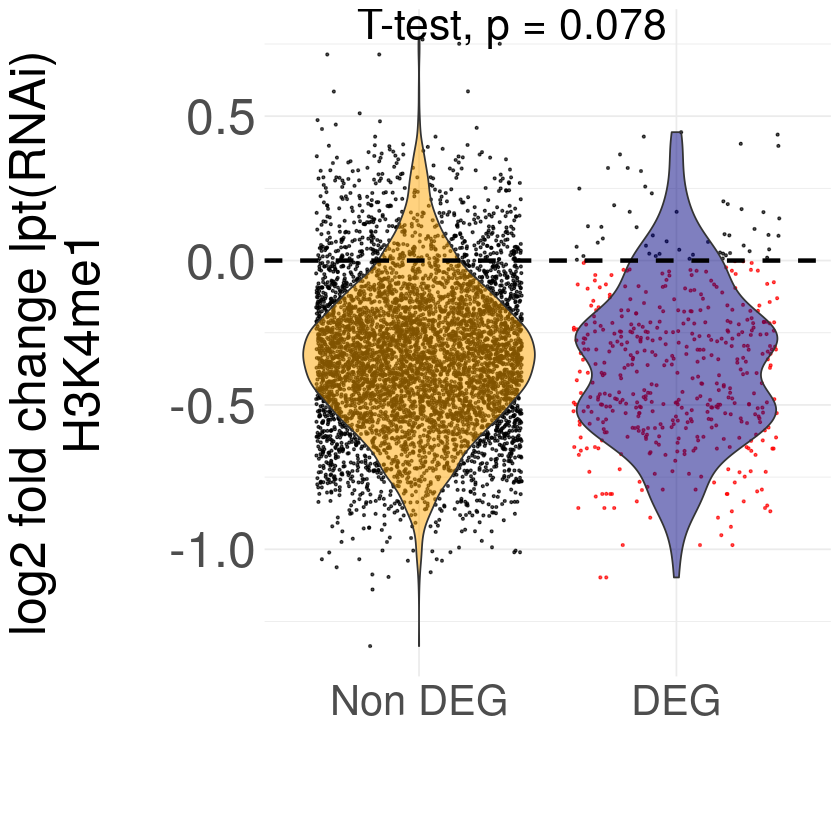

In [62]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 7)
#my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(enhancer_transcriptsRNAi, aes(x=K4me1gene, y=K4me1RNAi, fill=K4me1gene)) +geom_jitter(aes(col=K4me1color), size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me1\n")
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG"))
p = p + stat_compare_means(method = "t.test", size=9)
p

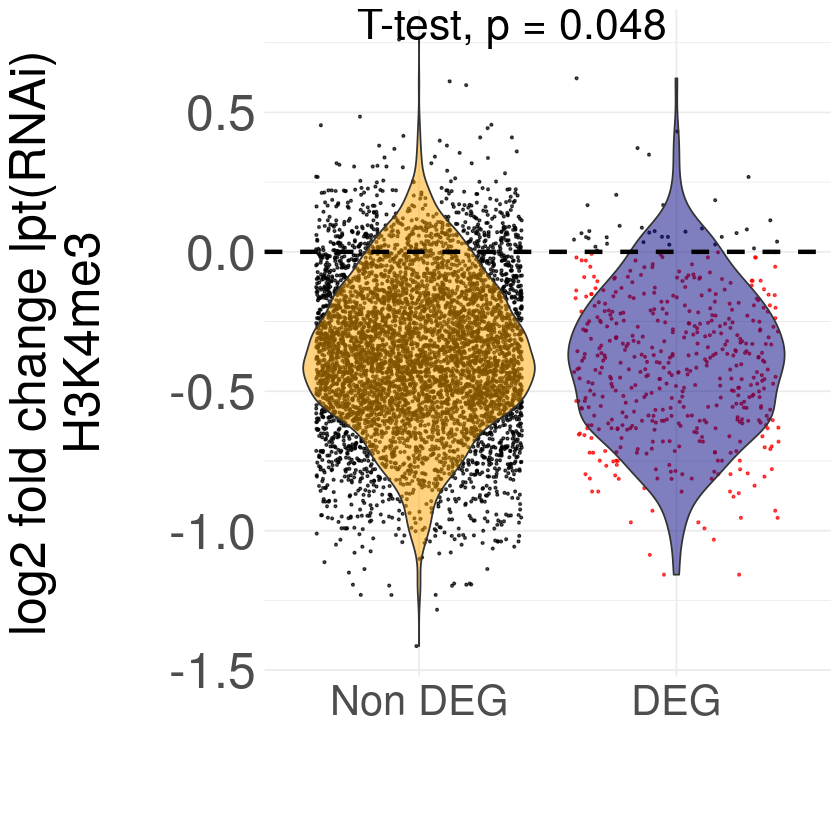

In [63]:
library(ggpubr)
options(repr.plot.width = 7, repr.plot.height = 7)
#my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(enhancer_transcriptsRNAi, aes(x=K4me1gene, y=K4me3RNAi, fill=K4me1gene)) +geom_jitter(aes(col=K4me3color), size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me3\n")
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG"))
p = p + stat_compare_means(method = "t.test", size=9)
p

# 4. Differential expression and log2 fold-change

In [44]:
deseq_table_gene = read.csv("/hydra/chip_RNAi/RNAseq/DESeq2_table_geneRNAioct21.csv")

In [45]:
enhancer_annotation_FACSRNAi = read.csv("/hydra/enhancer_regions/enhancer_annotation_FACSRNAi_july21.csv")

In [46]:
enhancer_annotation_FACSRNAi$K4me1gene = "0"
enhancer_annotation_FACSRNAi$K4me1color = "0"
enhancer_annotation_FACSRNAi$K4me3color = "0"
enhancer_annotation_FACSRNAi$K4me1RNAsignf = 0
enhancer_annotation_FACSRNAi$K4me1RNAlogFC = 0
for (i in 1:nrow(enhancer_annotation_FACSRNAi)){
    gene_table = deseq_table_gene[which(deseq_table_gene$X == enhancer_annotation_FACSRNAi$geneId[i]),]
    qvalue = gene_table$padj[1]
    bvalue = subset(gene_table, gene_table$padj == qvalue, na.rm=TRUE)$log2FoldChange[1]
    if ((length(qvalue) == 1) & (is.na(enhancer_annotation_FACSRNAi$K4me1RNAsignf[i]) == FALSE)){
        enhancer_annotation_FACSRNAi$K4me1RNAsignf[i] = qvalue
        enhancer_annotation_FACSRNAi$K4me1RNAlogFC[i] = bvalue
    }
    if ((enhancer_annotation_FACSRNAi$K4me1RNAsignf[i] < 0.05) & (is.na(enhancer_annotation_FACSRNAi$K4me1RNAsignf[i]) == FALSE)){
        enhancer_annotation_FACSRNAi$K4me1gene[i] = "1"
        if (enhancer_annotation_FACSRNAi$K4me1RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me1color[i] = "1"
        }
        if (enhancer_annotation_FACSRNAi$K4me3RNAi[i] < 0){
            enhancer_annotation_FACSRNAi$K4me3color[i] = "1"
        }
    }
}

In [47]:
write.csv(enhancer_annotation_FACSRNAi, "/hydra/FACS/enhancer_annotation_FACSRNAi_annotated_deseq2_oct21.csv", row.names=FALSE)

In [48]:
enhancer_transcriptsRNAi = read.csv("/hydra/FACS/enhancer_annotation_FACSRNAi_annotated_deseq2_oct21.csv")

In [49]:
enhancer_transcriptsRNAi$K4me1gene = as.factor(enhancer_transcriptsRNAi$K4me1gene)
enhancer_transcriptsRNAi$K4me1color = as.factor(enhancer_transcriptsRNAi$K4me1color)
enhancer_transcriptsRNAi$K4me3color = as.factor(enhancer_transcriptsRNAi$K4me3color)

Warning message:
“Removed 822 rows containing missing values (geom_point).”


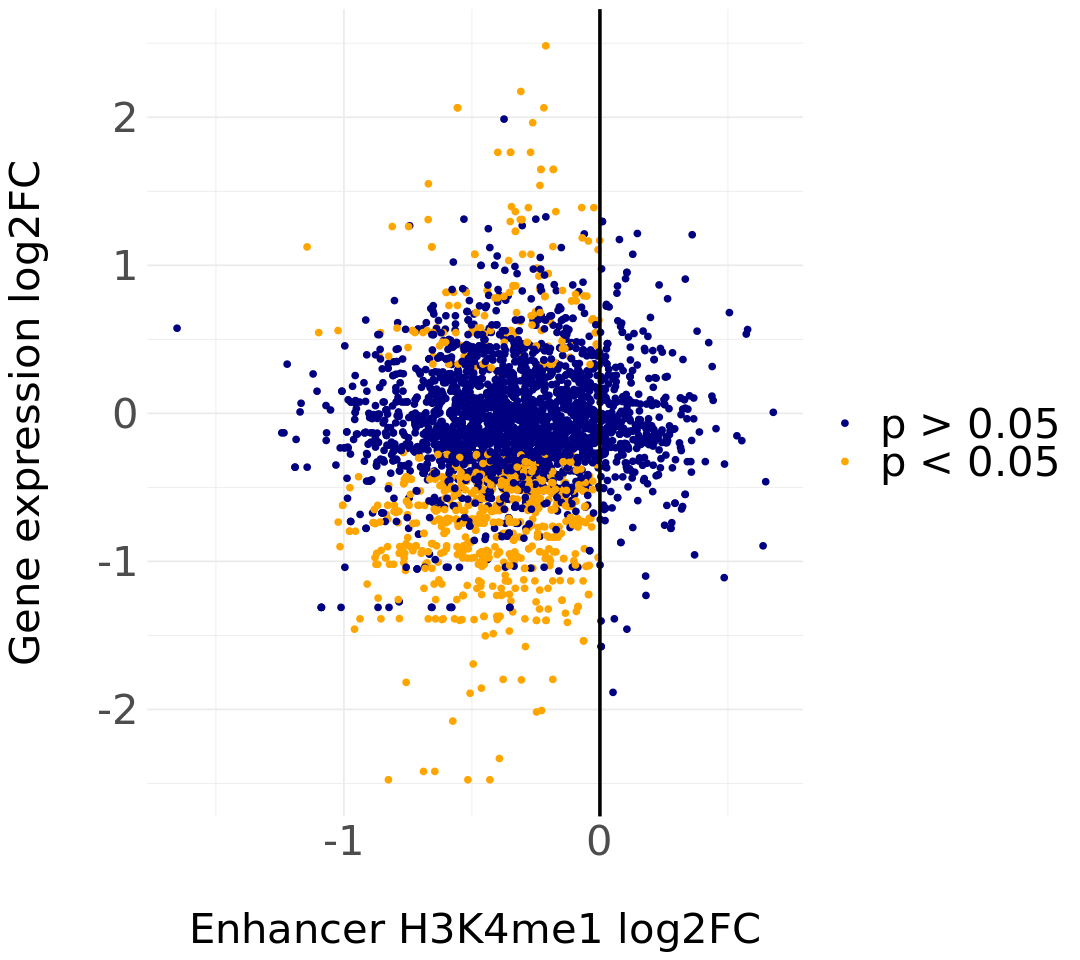

In [51]:
library(ggplot2)
#df = data.frame(fw = log10(x1notnutll$FWX1), rv = log10(x1notnutll$RVX1))
options(repr.plot.width = 9, repr.plot.height = 8)
# Basic scatter plot
p = ggplot(enhancer_transcriptsRNAi, aes(x=K4me1RNAi, y=K4me1RNAlogFC, col=K4me1color))+geom_point()
p = p + theme_minimal()
p = p + scale_color_manual(name=" ", labels=c("p > 0.05", "p < 0.05"), values=c("navyblue", "orange"))
#p = p + stat_density_2d(col="darkgrey", size=0.5)
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlab("\nEnhancer H3K4me1 log2FC") + ylab("Gene expression log2FC\n")
#p = p + geom_abline(intercept = 0, slope = 0, col="red", size=2)
p = p + geom_vline(xintercept = 0, col="black", size=1)
#p = p +geom_smooth(method = "lm", size=1.5, col="lightblue")
#p = p + ggtitle("Promoters\n")
#p = p + geom_text(x=-0.5, y=0.9, label="Spearman: 0.33", size=7)
p

In [2]:
enhancer_transcriptsRNAi = read.csv("/hydra/FACS/enhancer_annotation_FACSRNAi_annotated_deseq2_oct21.csv")

In [53]:
nrow(enhancer_transcriptsRNAi)

[1] 4326

In [54]:
nrow(subset(enhancer_transcriptsRNAi, enhancer_transcriptsRNAi$K4me1color == 1))

[1] 874

In [55]:
4326-874
874/4326

[1] 3452

[1] 0.2020342

In [58]:
deseq_table_gene = read.csv("/hydra/chip_RNAi/RNAseq/DESeq2_table_geneRNAioct21.csv")

In [59]:
deseq_table_signf = subset(deseq_table_gene, deseq_table_gene$pvalue < 0.05)

In [60]:
print(nrow(deseq_table_gene))
print(nrow(deseq_table_signf))

[1] 28003
[1] 3972


In [61]:
28003-3972
3972/28003

[1] 24031

[1] 0.1418419

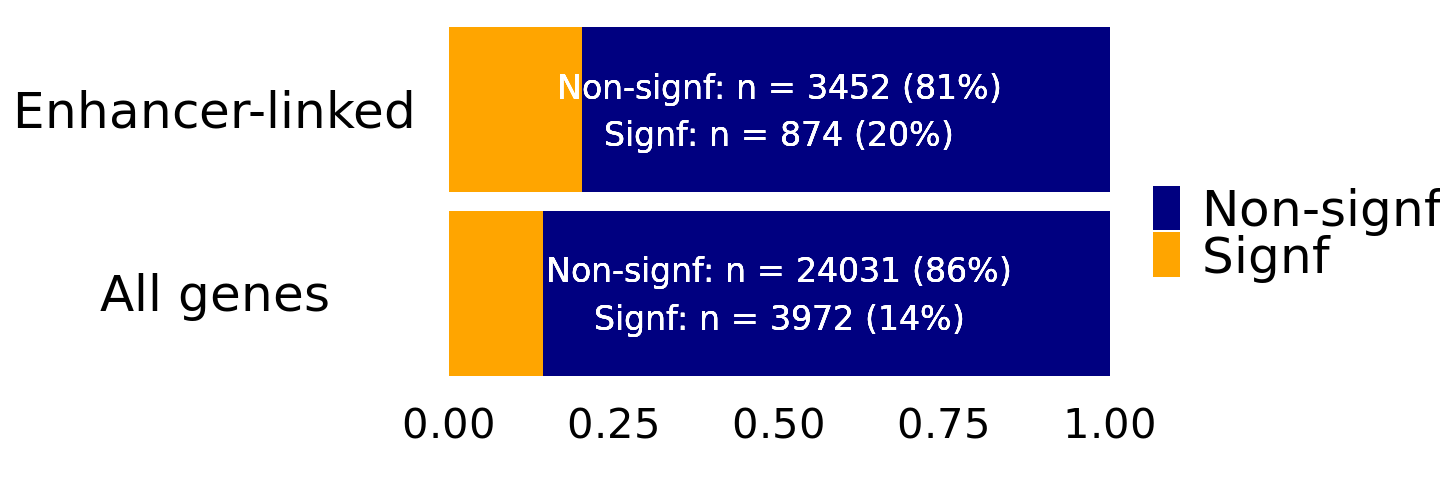

In [62]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 4)
df = data.frame(class=factor(c("Non-signf", "Signf"), levels=c("Non-signf", "Signf")), value=c(24031, 3972, 3452, 874), id = c("All genes", "All genes", "Enhancer-linked", "Enhancer-linked"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "orange"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("Non-signf: n = 24031 (86%)\nSignf: n = 3972 (14%)"), y=c(0.50), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("Non-signf: n = 3452 (81%)\nSignf: n = 874 (20%)"), y=c(0.50), x=2), size = 7, col="white")
p

In [63]:
table = as.table(as.matrix(data.frame("All" = c(24031,3972), "Enhancer" = c(3452,874))))
table

    All Enhancer
A 24031     3452
B  3972      874

In [64]:
chisq.test(table)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 106.07, df = 1, p-value < 2.2e-16


In [57]:
deseq_table_gene$enhancer = "a"
for (i in 1:nrow(deseq_table_gene)){
    if (deseq_table_gene$X[i] %in% enhancer_transcriptsRNAi$geneId){
        deseq_table_gene$enhancer[i] = "b"
    } else {
        deseq_table_gene$enhancer[i] = "a"
    }
}


In [65]:
mean(subset(deseq_table_gene, deseq_table_gene$enhancer=="b")$log2FoldChange, na.rm=TRUE)
mean(subset(deseq_table_gene, deseq_table_gene$enhancer=="a")$log2FoldChange, na.rm=TRUE)

[1] 0.01777557

[1] -0.133498

Warning message:
“Removed 1005 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1005 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 1005 rows containing missing values (geom_point).”


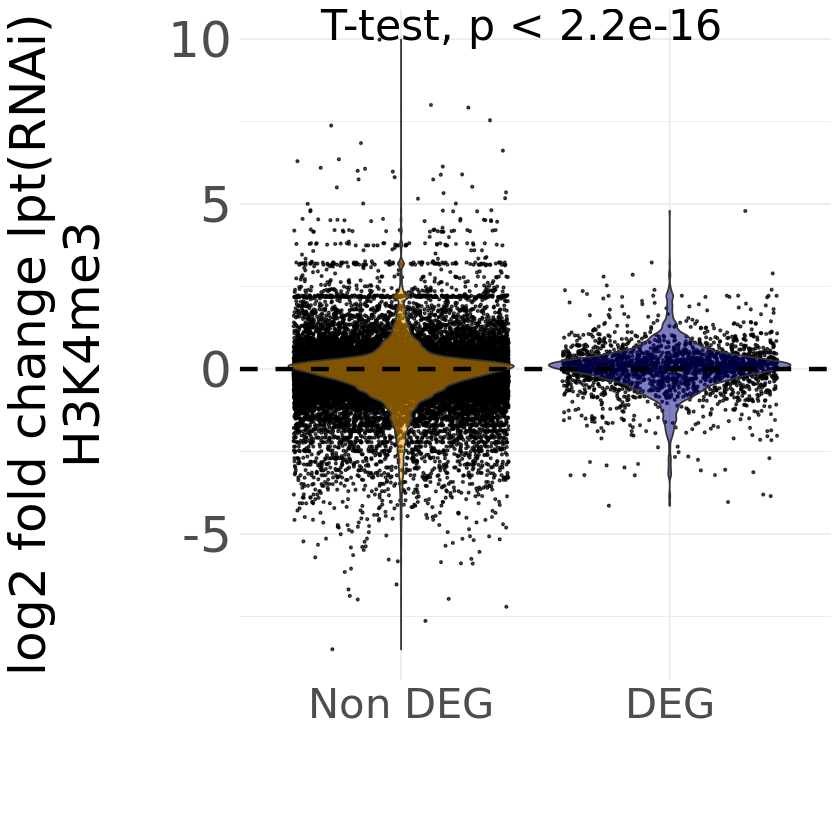

In [61]:
library(ggpubr)
options(repr.plot.width = 7, repr.plot.height = 7)
#my_comparisons = list( c("chip", "k27ac"), c("k27ac", "k4me1"), c("chip", "k4me1"))
p = ggplot(deseq_table_gene, aes(x=enhancer, y=log2FoldChange, fill=enhancer)) +geom_jitter(size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("log2 fold change lpt(RNAi)\nH3K4me3\n")
p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Non DEG", "DEG"))
p = p + stat_compare_means(method = "t.test", size=9)
p

In [2]:
enhancer_transcriptsRNAi = read.csv("/hydra/FACS/enhancer_annotation_FACSRNAi_annotated_deseq2_july21.csv")

In [3]:
enhancer_transcriptsRNAi

seqnames      start   end     width strand V4                             
1    dd_Smes_g4_1   780848  781226 379   *      k27ac_pooled_april21_peak_22   
2    dd_Smes_g4_1   863083  863552 470   *      k27ac_pooled_april21_peak_28   
3    dd_Smes_g4_1   908972  909390 419   *      k27ac_pooled_april21_peak_31   
4    dd_Smes_g4_1   959652  960010 359   *      k27ac_pooled_april21_peak_33   
5    dd_Smes_g4_1  1399146 1399214  69   *      k27ac_pooled_april21_peak_51   
6    dd_Smes_g4_1  1399542 1400136 595   *      k27ac_pooled_april21_peak_51   
7    dd_Smes_g4_1  1545689 1546133 445   *      k27ac_pooled_april21_peak_59   
8    dd_Smes_g4_1  2151011 2151414 404   *      k27ac_pooled_april21_peak_80   
9    dd_Smes_g4_1  2159721 2160064 344   *      k27ac_pooled_april21_peak_86   
10   dd_Smes_g4_1  2343324 2343543 220   *      k27ac_pooled_april21_peak_90   
11   dd_Smes_g4_1  2349136 2349358 223   *      k27ac_pooled_april21_peak_92   
12   dd_Smes_g4_1  2351478 2352061 584   *      k27ac_pooled_april21_peak_93   
13   dd_Smes_g4_1  2542195 2542448 254   *      k27ac_pooled_april21_peak_113  
14   dd_Smes_g4_1  2597700 2597936 237   *      k27ac_pooled_april21_peak_121  
15   dd_Smes_g4_1  2597700 2597936 237   *      k27ac_pooled_april21_peak_122  
16   dd_Smes_g4_1  2599081 2599281 201   *      k27ac_pooled_april21_peak_123  
17   dd_Smes_g4_1  2599081 2599281 201   *      k27ac_pooled_april21_peak_124  
18   dd_Smes_g4_1  2641498 2641880 383   *      k27ac_pooled_april21_peak_142  
19   dd_Smes_g4_1  2910166 2910438 273   *      k27ac_pooled_april21_peak_166  
20   dd_Smes_g4_1  2911452 2911493  42   *      k27ac_pooled_april21_peak_167  
21   dd_Smes_g4_1  3055361 3055443  83   *      k27ac_pooled_april21_peak_204  
22   dd_Smes_g4_1  3174683 3174707  25   *      k27ac_pooled_april21_peak_210  
23   dd_Smes_g4_1  3454316 3455081 766   *      k27ac_pooled_april21_peak_240  
24   dd_Smes_g4_1  3642415 3642640 226   *      k27ac_pooled_april21_peak_248  
25   dd_Smes_g4_1  4012605 4013246 642   *      k27ac_pooled_april21_peak_270  
26   dd_Smes_g4_1  4385190 4385745 556   *      k27ac_pooled_april21_peak_296  
27   dd_Smes_g4_1  4450550 4451181 632   *      k27ac_pooled_april21_peak_308  
28   dd_Smes_g4_1  4479332 4479848 517   *      k27ac_pooled_april21_peak_310  
29   dd_Smes_g4_1  4680382 4680651 270   *      k27ac_pooled_april21_peak_319  
30   dd_Smes_g4_1  4704182 4704447 266   *      k27ac_pooled_april21_peak_322  
⋮    ⋮             ⋮       ⋮       ⋮     ⋮      ⋮                              
4297 dd_Smes_g4_97 1055152 1056032  881  *      k27ac_pooled_april21_peak_37187
4298 dd_Smes_g4_97 1055806 1056032  227  *      k27ac_pooled_april21_peak_37188
4299 dd_Smes_g4_97 1056796 1056806   11  *      k27ac_pooled_april21_peak_37188
4300 dd_Smes_g4_97 1056796 1057271  476  *      k27ac_pooled_april21_peak_37189
4301 dd_Smes_g4_97 1058373 1058587  215  *      k27ac_pooled_april21_peak_37190
4302 dd_Smes_g4_97 1389834 1390737  904  *      k27ac_pooled_april21_peak_37206
4303 dd_Smes_g4_97 1486504 1486589   86  *      k27ac_pooled_april21_peak_37215
4304 dd_Smes_g4_97 1655642 1656135  494  *      k27ac_pooled_april21_peak_37222
4305 dd_Smes_g4_97 2182609 2183208  600  *      k27ac_pooled_april21_peak_37229
4306 dd_Smes_g4_97 2183108 2183490  383  *      k27ac_pooled_april21_peak_37230
4307 dd_Smes_g4_97 2183993 2184108  116  *      k27ac_pooled_april21_peak_37230
4308 dd_Smes_g4_97 2184319 2185319 1001  *      k27ac_pooled_april21_peak_37231
4309 dd_Smes_g4_97 2187587 2187689  103  *      k27ac_pooled_april21_peak_37232
4310 dd_Smes_g4_97 2391799 2392046  248  *      k27ac_pooled_april21_peak_37242
4311 dd_Smes_g4_97 2446461 2446549   89  *      k27ac_pooled_april21_peak_37243
4312 dd_Smes_g4_98  144149  144620  472  *      k27ac_pooled_april21_peak_37244
4313 dd_Smes_g4_98  224751  225271  521  *      k27ac_pooled_april21_peak_37246
4314 dd_Smes_g4_98  760746  761030  285  *      k27ac_pooled_april21_peak_37251
4315 

In [ ]:
enhancer_transcriptsRNAi

`geom_smooth()` using formula 'y ~ x'



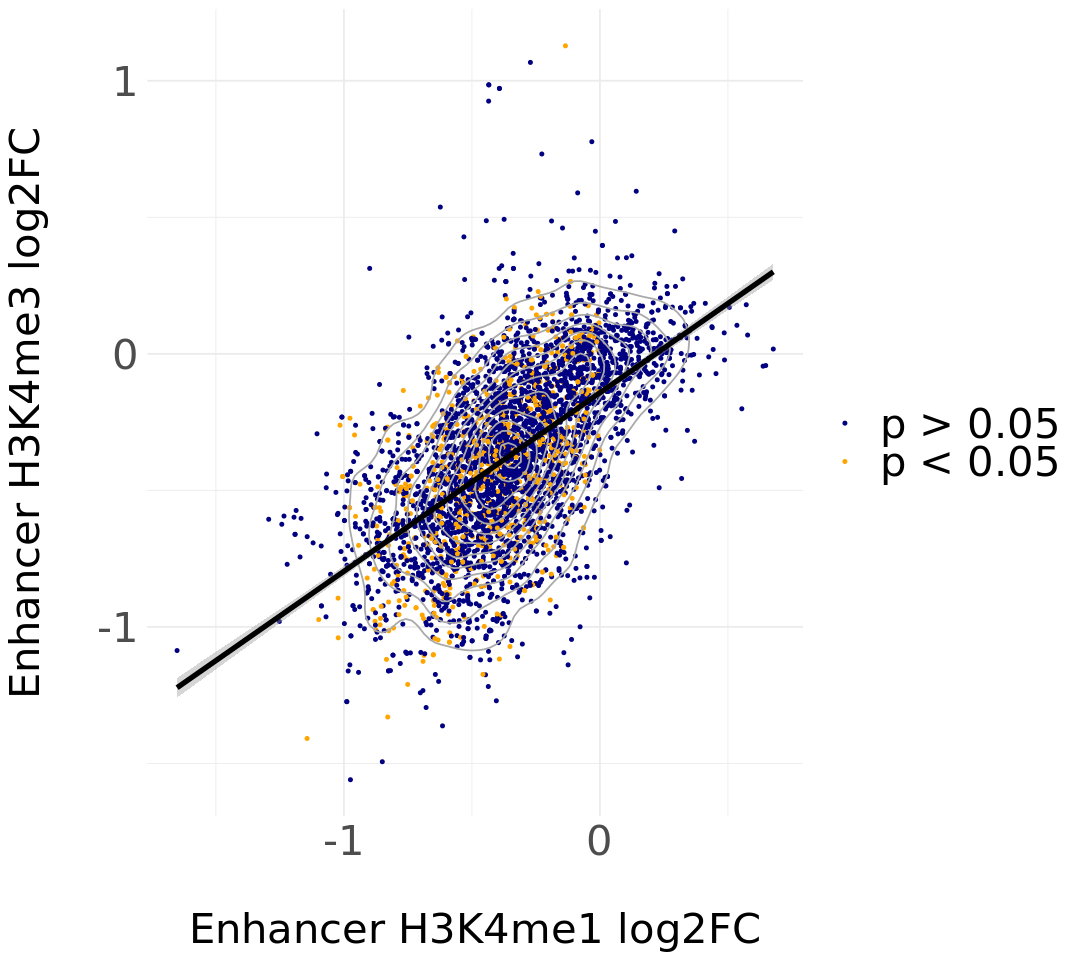

In [8]:
library(ggplot2)
#df = data.frame(fw = log10(x1notnutll$FWX1), rv = log10(x1notnutll$RVX1))
options(repr.plot.width = 9, repr.plot.height = 8)
# Basic scatter plot
p = ggplot(enhancer_transcriptsRNAi, aes(x=K4me1RNAi, y=K4me3RNAi, col=as.factor(K4me1color)))+geom_point(size=0.75)
p = p + theme_minimal()
p = p + scale_color_manual(name=" ", labels=c("p > 0.05", "p < 0.05"), values=c("navyblue", "orange"))
p = p + stat_density_2d(col="darkgrey", size=0.5)
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlab("\nEnhancer H3K4me1 log2FC") + ylab("Enhancer H3K4me3 log2FC\n")
#p = p + geom_abline(intercept = 0, slope = 0, col="red", size=2)
#p = p + geom_vline(xintercept = 0, col="black", size=1)
p = p +geom_smooth(method = "lm", size=1.5, col="black")
#p = p + ggtitle("Promoters\n")
#p = p + geom_text(x=-0.5, y=0.9, label="Spearman: 0.33", size=7)
p

In [ ]:
# 